In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
# Setting up Libraries
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

# Creating color palletes

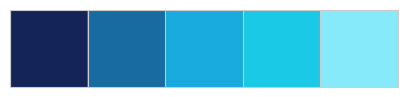

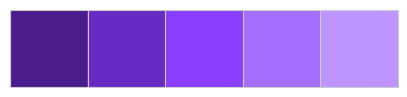

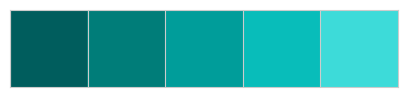

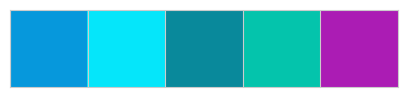

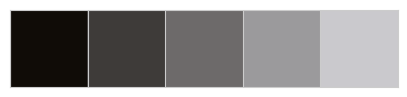

In [3]:
# Create a list of color palletes

cyan_grad = ['#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA']
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
teal_grad = ['#005D5D', '#007D79', '#009D9A', '#08BDBA', '#3DDBD9']
color_mix = ['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# gradient and pallette Key words.
# --- Plot Color Palletes ---
sns.palplot(cyan_grad)
sns.palplot(purple_grad)
sns.palplot(teal_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

# Reading the dataset

In [4]:
ds = pd.read_csv(r'Big Mart Sales new.csv')
ds.style.hide()
ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
ds.head().style.background_gradient(cmap='Blues')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809200,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269200,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.618000,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.095000,OUT010,1998,nan,Tier 3,Grocery Store,732.380000
4,NCD19,8.930000,Low Fat,0.000000,Household,53.861400,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200


In [6]:
ds.shape

(8523, 12)

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In the dataset there are are 12 columns

There are null values in Item_Weight and Outlet_Size

# Initial Data Exploration

Done before the pre-processing

# Categorical Variable

In [8]:
# Count all the categorical varibale without dropping any null values
ds.Item_Identifier.value_counts(dropna = False)

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

There are 1559 item IDs detected.

The ID start with the same specific character (Ex: "DR", "FD", or "NC") followed by numbers at the end of ID.

In [9]:
ds.Item_Fat_Content.value_counts(dropna = False) 

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

It can be seen that most of the products are categorized as "Low Fat" products.

There are inconsistent values, means that some values have same meaning but in different form. (Ex: "LF" and "low fat" for Low Fat", and "reg" for Regular).

In [10]:
ds.Item_Type.value_counts(dropna = False)

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

There are 16 item types available, with "Fruits and vegetables" became item type with the highest number.

However, the lowest number item type is "Seafood".

In [11]:
ds.Outlet_Identifier.value_counts(dropna = False)  

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

There are ten outlets, with almost all the outlets have the same number of outlets.

However, "OUT10" and "OUT19" have the least number of outlets.

In [12]:
ds.Outlet_Size.value_counts(dropna = False)

Outlet_Size
Medium    2793
NaN       2410
Small     2388
High       932
Name: count, dtype: int64

There are 3 types of outlet size, small, medium, and high size.

Medium size becomes the outlet size with the most number.

However, the smallest number outlet size is High size.

In [13]:
ds.Outlet_Location_Type.value_counts(dropna = False)

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

There are 3 levels of outlet location, tier 1, tier 2, and tier 3.

Tier 3 becomes the outlet location with the most number.

However, the smallest number outlet location is Tier 1.

In [14]:
ds.Outlet_Type.value_counts(dropna = False)

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

There are 4 outlet types namely grocery store, supermarket type 1, supermarket type 2, and supermarket type 3.

Supermarket type 1 becomes the outlet type with the most number.

However, the smallest number outlet type is supermarket type 2

# Continuous variable

The second variable to be explored is the continuous variable

# Descriptive statistics

Exploring the descriptive statistics of the numerical variables

In [15]:
ds.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap="GnBu")

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.000000,12.857645,4.643456,4.555000,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.000000,0.066132,0.051598,0.000000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.000000,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.000000,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.000000,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


# Continuous column distribution

We are going to investigate the continuus column distribution using histogram and boxplots

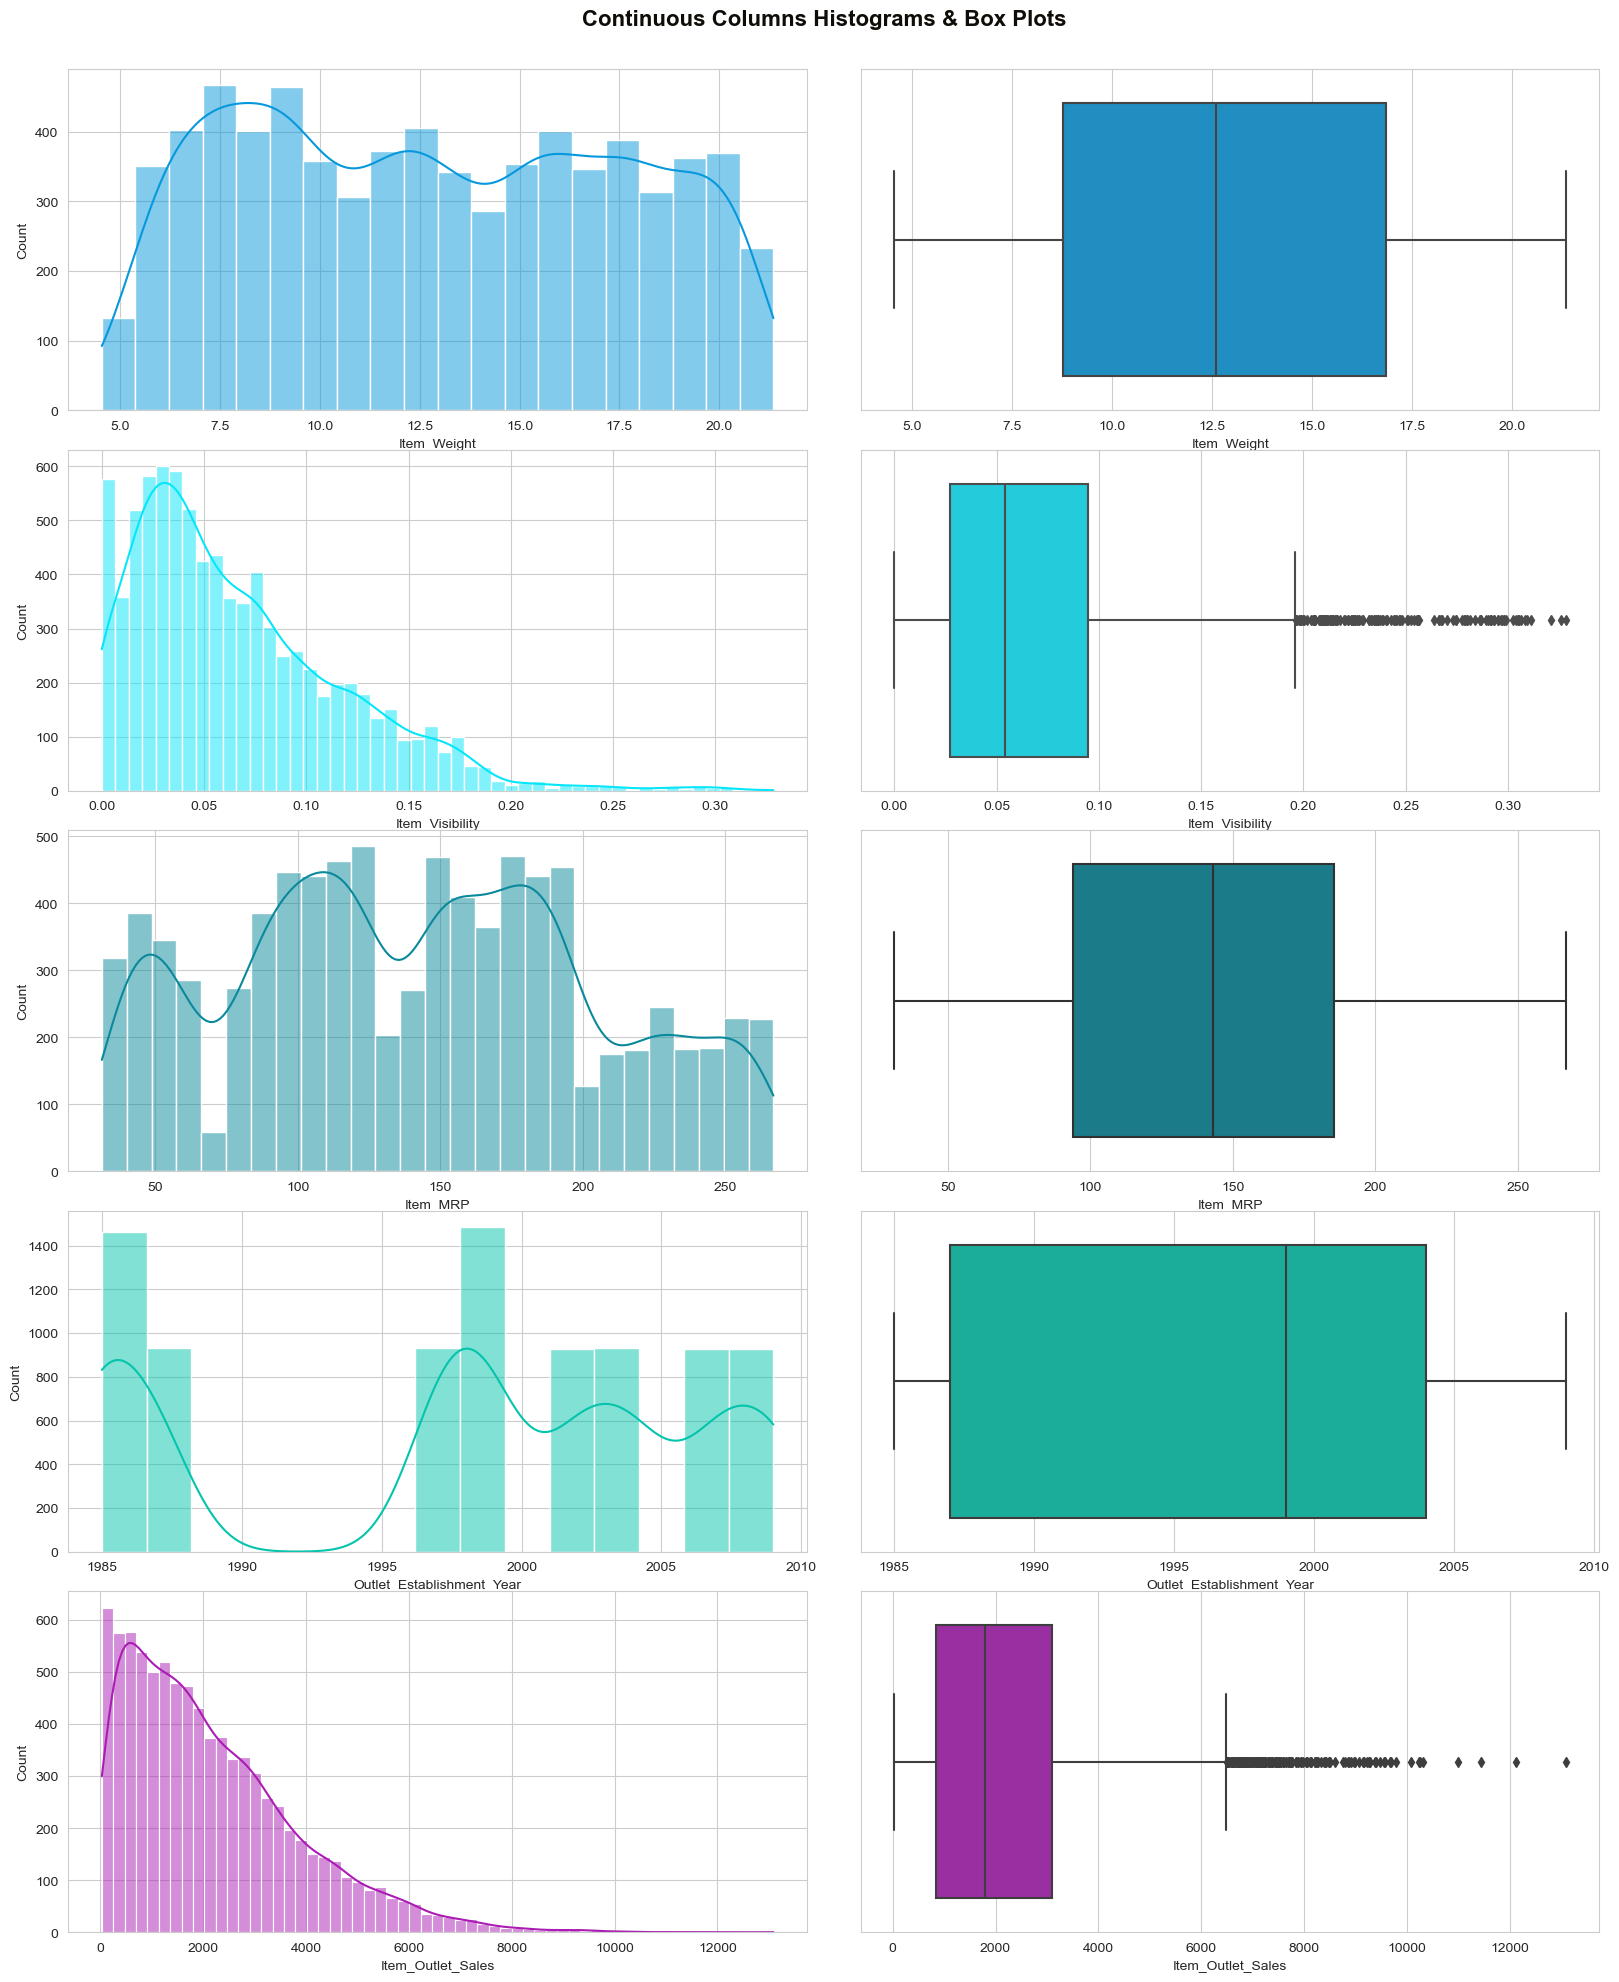

In [16]:
# --- Plot Size ---
fig, axs = plt.subplots(5, 2, figsize=(16, 20))

# --- General Title ---
fig.tight_layout() ## padding to ensure that they do not overlap
fig.subplots_adjust(top=0.95) # fit within 95% of the fig height
fig.suptitle('Continuous Columns Histograms & Box Plots', fontweight='bold', fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Histogram of Continuous Variables (Row 1) ---
# ax Specifies that the plot should be drawn on the first subplot (top-left) in the 
sns.histplot(data=ds, x='Item_Weight', kde=True, ax=axs[0, 0], color=color_mix[0])
sns.boxplot(data=ds, x='Item_Weight', ax=axs[0, 1], color=color_mix[0]);

# --- Histogram of Continuous Variables (Row 2) ---
sns.histplot(data=ds, x='Item_Visibility', kde=True, ax=axs[1, 0], color=color_mix[1])
sns.boxplot(data=ds, x='Item_Visibility', ax=axs[1, 1], color=color_mix[1])

# --- Histogram of Continuous Variables (Row 3) ---
sns.histplot(data=ds, x='Item_MRP', kde=True, ax=axs[2, 0], color=color_mix[2])
sns.boxplot(data=ds, x='Item_MRP', ax=axs[2, 1], color=color_mix[2])

# --- Histogram of Continuous Variables (Row 4) ---
sns.histplot(data=ds, x='Outlet_Establishment_Year', kde=True, ax=axs[3, 0], color=color_mix[3])
sns.boxplot(data=ds, x='Outlet_Establishment_Year', ax=axs[3, 1], color=color_mix[3])

# --- Histogram of Continuous Variables (Row 5) ---
sns.histplot(data=ds, x='Item_Outlet_Sales', kde=True, ax=axs[4, 0], color=color_mix[4])
sns.boxplot(data=ds, x='Item_Outlet_Sales', ax=axs[4, 1], color=color_mix[4]);

Item_Weight, Item_MRP, and Outlet_Establishment_Year distribution is normal (no outliers detected in these columns).

For Item_Visibility and Item_Outlet_Sales distribution, the distribution is right-skewed distributions (has a long right tail, the mean position is on the right side of the data).



# Skewness and Kurtosis


In [17]:
# Checking the skewness of the continuous variables
ds.select_dtypes(exclude = 'object').skew(axis = 0, skipna = True)

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

As mentioned in previous section, for Item_Visibility and Item_Outlet_Sales are highly skewed since the skewness value are more than 1.

The rest of the columns, namely Item_Weight, Item_MRP, and Outlet_Establishment_Year are normally skewed since the skewness is less than 0.5.

Note: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [18]:
#  Checking for kurtosis of the continuous variables
ds.select_dtypes(exclude='object').kurt(axis = 0, skipna = True)

Item_Weight                 -1.227766
Item_Visibility              1.679445
Item_MRP                    -0.889769
Outlet_Establishment_Year   -1.205694
Item_Outlet_Sales            1.615877
dtype: float64

All continuous variables are platikurtic since the kurtosis values are less than 3.

Note: Kurtosis values used to show tailedness of a column. The value of normal distribution (mesokurtotic) should be equal to 3. If kurtosis value is more than 3, it is called leptokurtic. Meanwhile, if kurtosis value is less than 3, then it is called platikurtic

# Handling Dirty Data

In [19]:
ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Almost all columns have no missing value except "Item_Weight" and "Outlet_Size" columns.

The total of missing values in each column is less than 25%, which means that imputation can still be done to fill in the missing values in the two columns. There are 1463 missing values in "Item_Weight" column and 2410 missing values in "Outlet_Size" column.

# Data Pre-processing

data pre-processing will be perfomed in this section to ensure quality cleaning of the data,imputing missing values and handling outliers 

# Data cleaning

Previously, there are some incosistent values detected in "Item_Fat_Content" column.

Here, those inconsistent values will be transformed into one value, which has the same meaning/interpretation.

In [20]:
# Transforming Low Fat inconsistent values
ds['Item_Fat_Content'] = ds['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')

In [21]:
# Transform Regular inconsistent values
ds['Item_Fat_Content'] = ds['Item_Fat_Content'].replace('reg', 'Regular')

In [22]:
ds.Item_Fat_Content.value_counts(dropna = False)

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# Handling Missing Values

Lets handle the missing values in Item_Weight and Outlet_Size

# Outlet size

In [23]:
ds.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Siz e'], ascending=False).style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,528
4,Supermarket Type1,Small,1311
3,Supermarket Type1,Medium,930
6,Supermarket Type2,Medium,928
7,Supermarket Type3,Medium,935
2,Supermarket Type1,High,932
1,Grocery Store,nan,555
5,Supermarket Type1,nan,1305


It can be seen that small outlet size belongs to grocery store and supermarket type 1.

Beside doing imputation with mode method, last value replacment value method will be used in order to avoid bias when doing further analysis.

In [24]:
# Imputation with the last value replacement method
ds['Outlet_Size'] = ds['Outlet_Size'].replace(np.nan, 'Small')

In [25]:
ds.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False).style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,901
3,Supermarket Type1,Small,1512
2,Supermarket Type1,Medium,930
4,Supermarket Type2,Medium,928
5,Supermarket Type3,Medium,935
1,Supermarket Type1,High,932


In [26]:
ds.Outlet_Size.value_counts(dropna=False)

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

# Item Weight

In [27]:
ds[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier']).head(13).style.background_gradient(cmap='PuBu').set_properties(**{'font-family': 'Segoe UI'})

,Item_Identifier,Item_Weight
118,DRA12,11.600000
2879,DRA24,nan
1148,DRA24,19.350000
6057,DRA59,nan
1876,DRA59,8.270000
3733,DRB01,nan
3465,DRB01,7.390000
1431,DRB13,6.115000
2657,DRB24,8.785000
776,DRB25,12.300000


From the table, there are some previous "Item_Weight" values in the dataset based on the "Item_Identifier" column.

In order to make high quality dataset, these missing values will be imputed using last value replacement method

In [29]:
# Last value replacement using bfill and ffill
ds['Item_Weight'] = ds.groupby('Item_Identifier')['Item_Weight'].fillna(method='ffill')
ds['Item_Weight'] = ds.groupby('Item_Identifier')['Item_Weight'].fillna(method='bfill')

In [30]:
ds[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier']).head(13).style.background_gradient(cmap='PuBu').set_properties(**{'font-family': 'Segoe UI'})

,Item_Identifier,Item_Weight
118,DRA12,11.600000
1148,DRA24,19.350000
1876,DRA59,8.270000
3465,DRB01,7.390000
1431,DRB13,6.115000
2657,DRB24,8.785000
776,DRB25,12.300000
103,DRB48,16.750000
1,DRC01,5.920000
772,DRC12,17.850000


In [31]:
# Check for any other missing values in the dataset
ds1 = ds[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])
nan_values = ds1[ds1['Item_Weight'].isna()]
print(nan_values)

     Item_Identifier  Item_Weight
4187           FDE52          NaN
1922           FDK57          NaN
927            FDN52          NaN
5022           FDQ60          NaN


In [32]:
# Second imputation using the mean method
ds['Item_Weight'] = ds['Item_Weight'].fillna(ds['Item_Weight'].mean())

In [33]:
# After Imputation
ds.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

The missing values are no longer present in the dataset

# Handling Outliers

As noted before, Item_visibility and Item_Outlet_Sales have outliers

In this section I am going to trasform those outliers using the log or square root transformation method. Then I will comoare both methods before applying them into the final dataset

In [36]:
# Create a copy of both columns
ds1 = ds[['Item_Visibility','Item_Outlet_Sales']].copy()

# Using the log tranformation method
ds1['Item_Visibility_log'] = np.log(ds1['Item_Visibility'])
ds1['Item_Outlet_Sales_log'] = np.log(ds1['Item_Outlet_Sales'])

# Using the Square root trasnfromation method
ds1['Item_Visibility_sqrt'] = np.sqrt(ds1['Item_Visibility'])
ds1['Item_Outlet_Sales_sqrt'] = np.sqrt(ds1['Item_Outlet_Sales'])

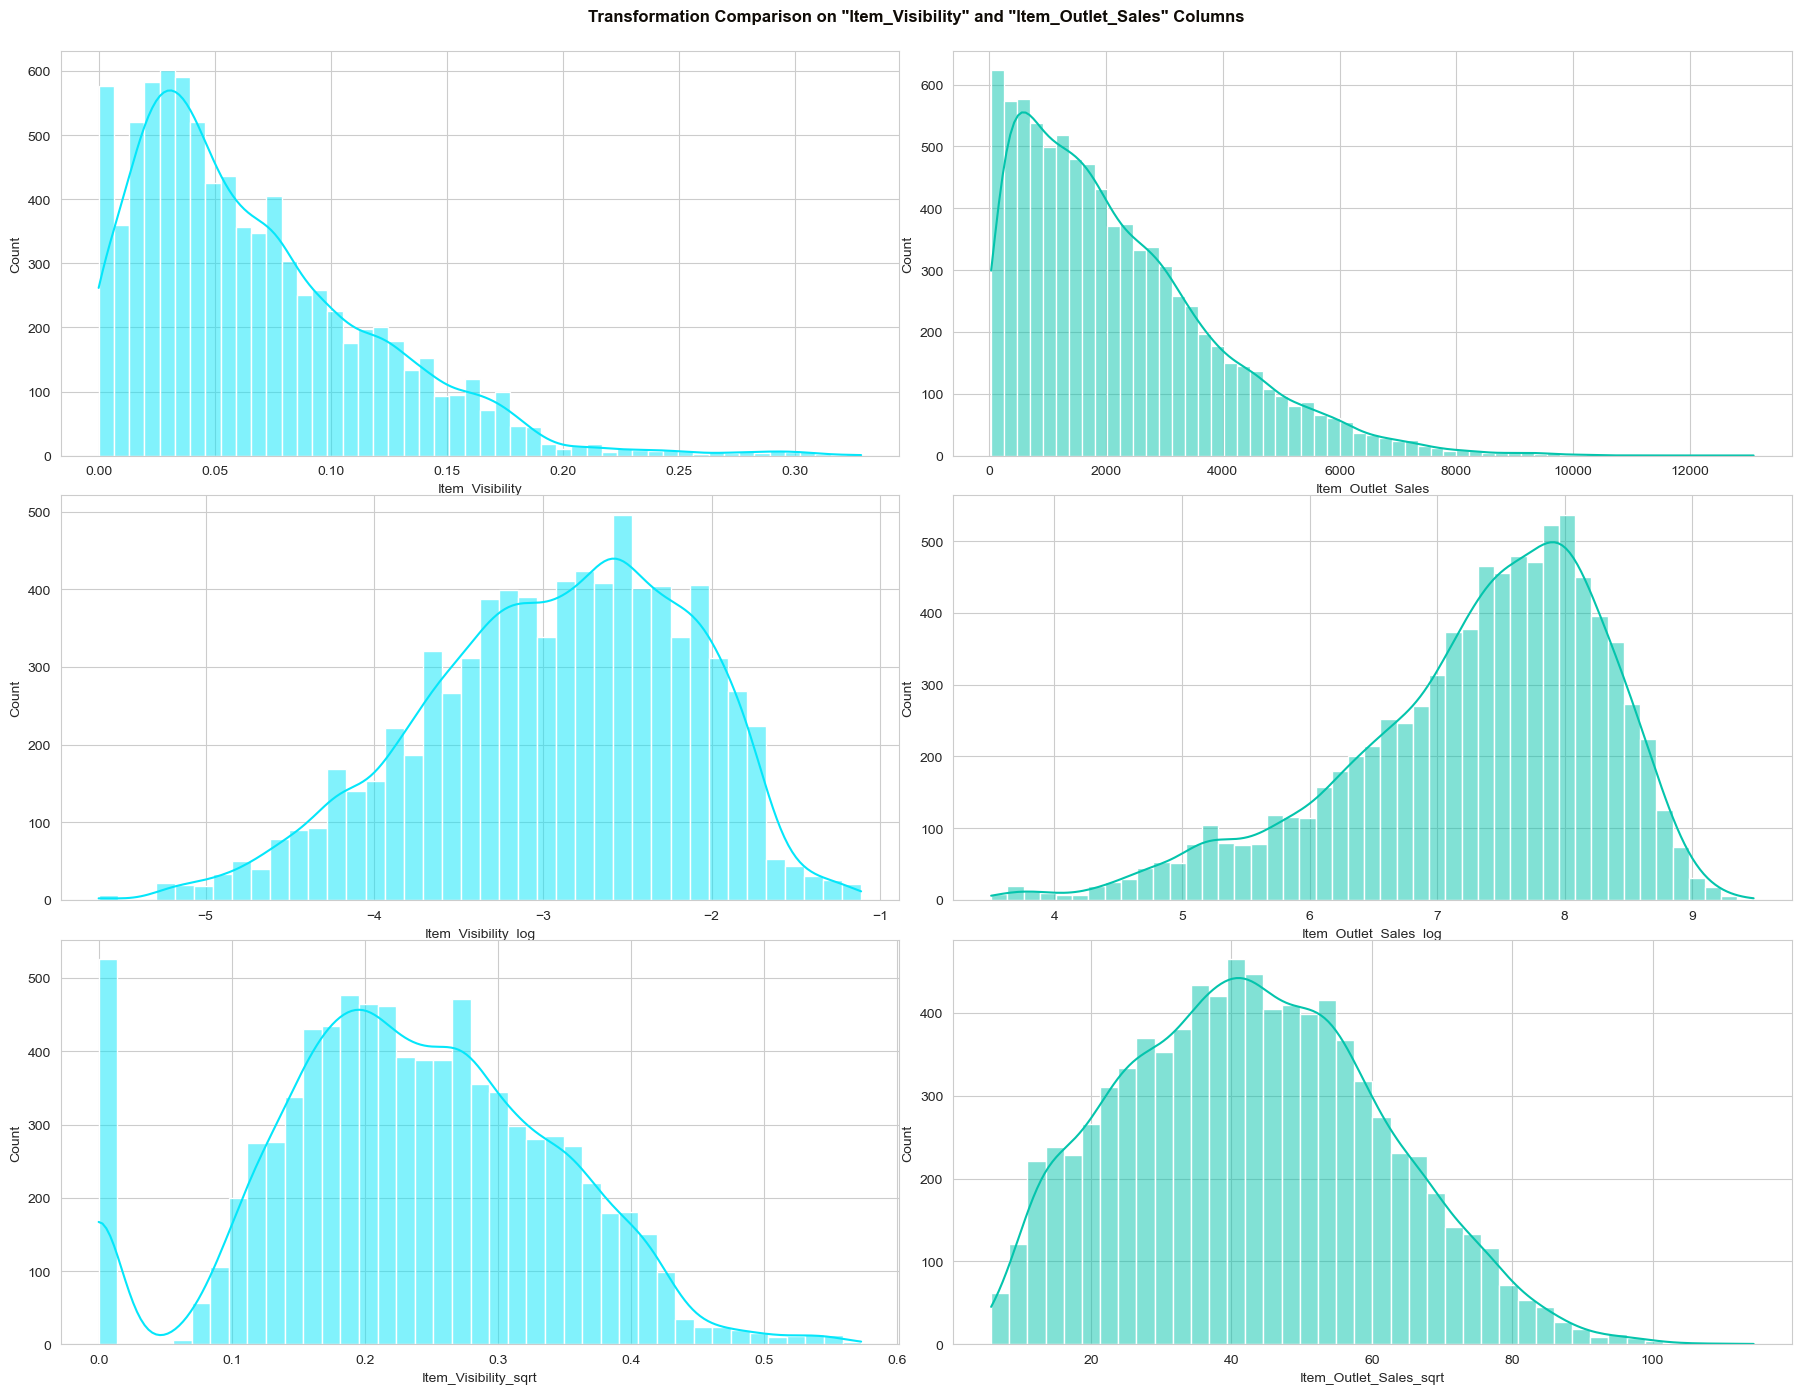

In [37]:
# Plot size
fig, axs = plt.subplots(3, 2, figsize=(18, 14))

# General Title
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Transformation Comparison on "Item_Visibility" and "Item_Outlet_Sales" Columns', fontweight='bold', fontfamily='sans-serif', color = black_grad[0])

# Histogram of Item_Visibility trasnformation column 1
sns.histplot(data = ds1, x = 'Item_Visibility', kde = True, ax = axs[0,0], color = color_mix[1])
sns.histplot(data = ds1, x = 'Item_Visibility_log', kde = True, ax = axs[1,0], color = color_mix[1])
sns.histplot(data = ds1, x = 'Item_Visibility_sqrt', kde = True, ax = axs[2,0], color = color_mix[1])

# Histogram of Item_Outlet_Sales trasnformation column 2
sns.histplot(data = ds1, x = 'Item_Outlet_Sales', kde = True, ax = axs[0,1], color = color_mix[3])
sns.histplot(data = ds1, x = 'Item_Outlet_Sales_log', kde = True, ax = axs[1,1], color = color_mix[3])
sns.histplot(data = ds1, x = 'Item_Outlet_Sales_sqrt', kde = True, ax = axs[2,1], color = color_mix[3]);

In [38]:
# checking the skewmess of continuous variable
ds1.skew(axis = 0, skipna = True)

Item_Visibility           1.167091
Item_Outlet_Sales         1.177531
Item_Visibility_log            NaN
Item_Outlet_Sales_log    -0.887753
Item_Visibility_sqrt     -0.098056
Item_Outlet_Sales_sqrt    0.234676
dtype: float64

Based on histograms, skewness, and kurtosis values, it can be concluded that square root transformation is better compared to log transformation.

It is because the histogram distributions of square root transformation are closer to nomral distribution even though there are still outliers detected in both columns.

In addition, from the skewness value showed that square root transformation able to reduce skewness value effectively.

The next step will apply square root transformation for both columns in real dataset.

In [42]:
# Apply the square root trasfromation method on the real data set
ds['Item_Visibility_sqrt'] = np.sqrt(ds['Item_Visibility'])
ds['Item_Outlet_Sales_sqrt'] = np.sqrt(ds['Item_Outlet_Sales'])

# Droping original columns
ds=ds.drop(columns=['Item_Visibility', 'Item_Outlet_Sales'])

In [43]:
ds.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Visibility_sqrt', 'Item_Outlet_Sales_sqrt'],
      dtype='object')

# Hypothesis Testing

Perfoming an Hypothesis test on the pre-processed data

# Hypothesis 1

H0: There is no heteroscedasticity between "Item_MRP" and "Item_Weight".

H1: There is heteroscedasticity between "Item_MRP" and "Item_Weight".

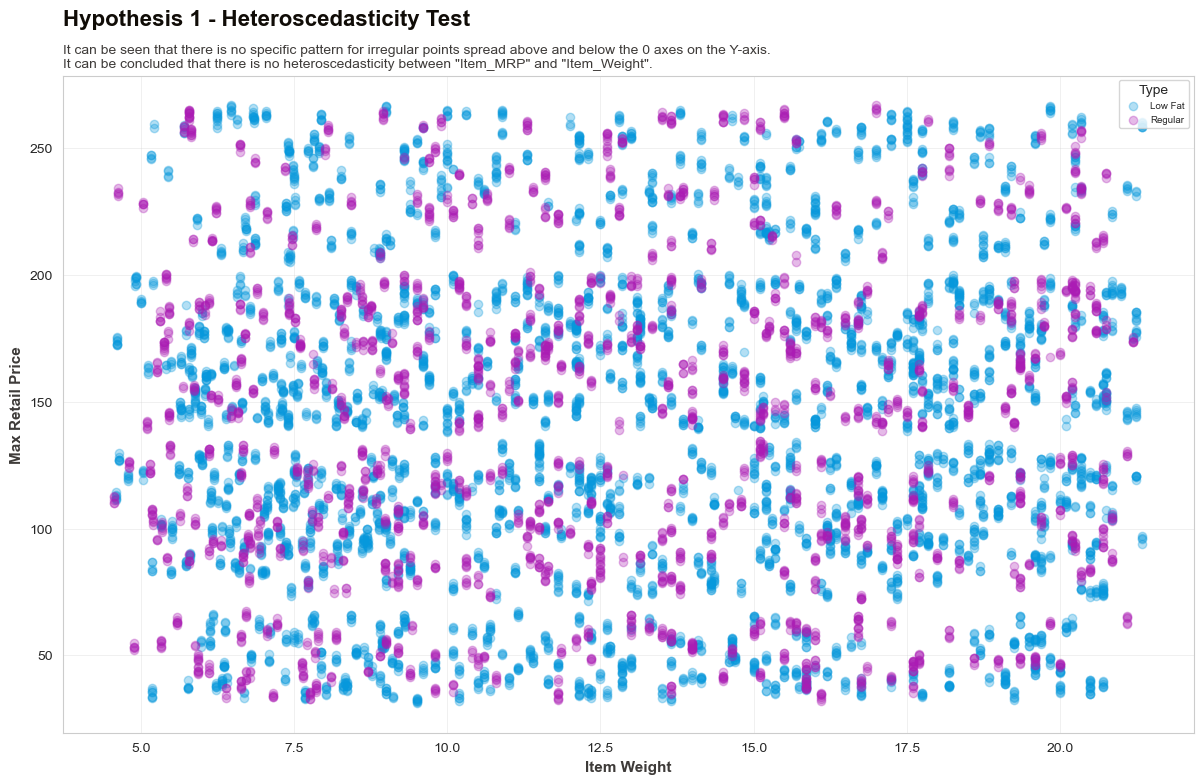

In [49]:
# Plot size
plt.figure(figsize=(12,8))

# Title
plt.suptitle('Hypothesis 1 - Heteroscedasticity Test', fontweight='heavy', x=0.0375, y=0.99, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('It can be seen that there is no specific pattern for irregular points spread above and below the 0 axes on the Y-axis.\nIt can be concluded that there is no heteroscedasticity between "Item_MRP" and "Item_Weight".', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# Creating the scatter plot
plt.scatter(x = ds.Item_Weight[ds.Item_Fat_Content == 'Low Fat'], y = ds.Item_MRP[ds.Item_Fat_Content == 'Low Fat'], color = color_mix[0], alpha =0.3)
plt.scatter(x = ds.Item_Weight[ds.Item_Fat_Content == 'Regular'], y = ds.Item_MRP[ds.Item_Fat_Content == 'Regular'], color = color_mix[4], alpha =0.3)

# Legend and labels setting
plt.legend(['Low Fat', 'Regular'], title = 'Type', fontsize = '7', loc = 'upper right', frameon = True)
plt.xlabel('Item Weight', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Max Retail Price', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ticklabel_format(style = 'plain', axis = 'both')
plt.grid(axis = 'both', alpha = 0.4, lw = 0.5)

plt.show();

▶ Conclusion: H0 accepted

# Hypothesis 2

H0: Tier 3 does not have the most numbers in "High" size outlets.

H1: Tier 3 has the most numbers in "High" size outlets.

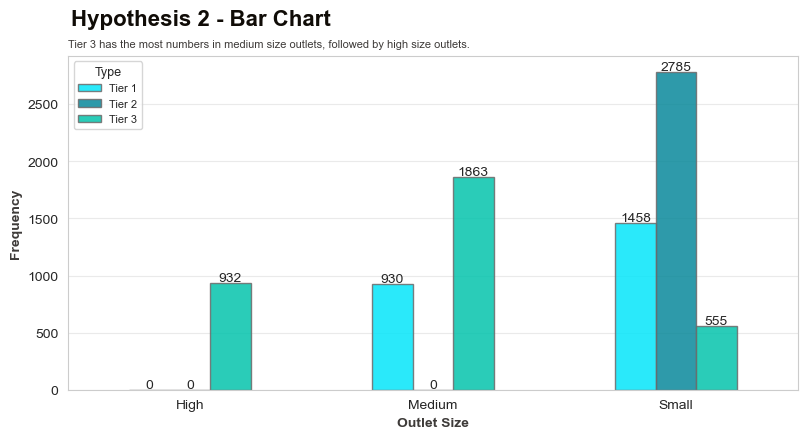

In [51]:
# label settings
labels = ['Tier 1', 'Tier 2', 'Tier 3']
label_type = np.array([0,1,2])
label_type2 = ['High', 'Medium', 'Small']

# Creating Bar Chart
ax = pd.crosstab(ds.Outlet_Size, ds.Outlet_Location_Type).plot(kind='bar', figsize=(8, 5), color=color_mix[1:4], 
                                                               alpha=0.85, edgecolor=black_grad[2])

# Bar Chart Settings
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+15, rect.get_height(), horizontalalignment='center', 
             fontsize=10)

plt.suptitle('Hypothesis 2 - Bar Chart', fontweight='heavy', ha='left', x=0.073, y=0.985, fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Tier 3 has the most numbers in medium size outlets, followed by high size outlets.', fontsize='8', 
          fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Outlet Size', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Frequency', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.xticks(label_type, label_type2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='Type', fontsize='8', title_fontsize='9', loc='upper left', frameon=True);

▶ Conclusion: H0 accepted

# Hypothesis 3

H0: There was a decrease in the number of outlets from 1985 to 1998.
    
H1: There was an increase in the number of outlets from 1985 to 1998.

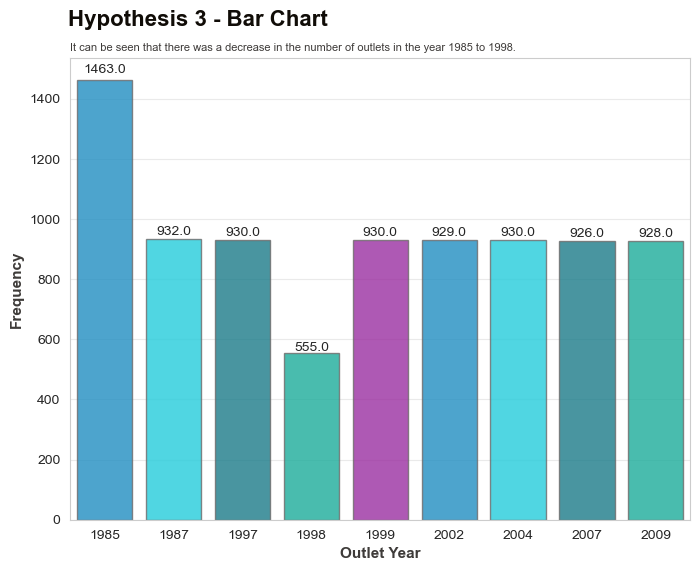

In [52]:
# Labels Settings
order = ds.Outlet_Establishment_Year.sort_values().reset_index(drop=True).unique()

# Creating Bar Chart
fig, ax = plt.subplots()
ax = sns.countplot(x='Outlet_Establishment_Year', data=ds, palette=color_mix, edgecolor=black_grad[2], alpha=0.8, 
                   order=order)

# Bar Chart Settings
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()*1.015, rect.get_height(), horizontalalignment='center', 
             fontsize=10)
fig.set_size_inches(8, 6)
plt.suptitle('Hypothesis 3 - Bar Chart', fontweight='heavy', x=0.122, y=0.96, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('It can be seen that there was a decrease in the number of outlets in the year 1985 to 1998.', fontsize='8', 
          fontfamily='sans-serif', loc='left', color=black_grad[1], pad=5)
plt.xlabel('Outlet Year', fontweight='bold', fontsize='11', fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Frequency', fontweight='bold', fontsize='11', fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', alpha=0.4);

▶ Conclusion: H0 accepted

# Feature Engineering

# Creating New Columns

# Item_Category

A new column called "Item_Category" will be created based on the first 2 letters in "Item_Identifier" column.

FD will be classified as food products, DR as drink products, and NC as non-consumable.

In [55]:
# Creating the Item_Category column
ds['Item_Category'] = ds['Item_Identifier'].astype(str).str[:2]
ds['Item_Category'] = ds['Item_Category'].replace(['FD','DR','NC'], ['Food', 'Drink', 'Non-Consumable'])

# Age Outlet

In [56]:
# Creating an Age Outlet column
ds['Age_Outlet'] = 2022-ds['Outlet_Establishment_Year']

# Final Data Frame

In [57]:
ds.head().style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'}).hide()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_sqrt,Item_Outlet_Sales_sqrt,Item_Category,Age_Outlet
FDA15,9.300000,Low Fat,Dairy,249.809200,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.126678,61.115775,Food,23
DRC01,5.920000,Regular,Soft Drinks,48.269200,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.138846,21.057607,Drink,13
FDN15,17.500000,Low Fat,Meat,141.618000,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.129461,45.795961,Food,23
FDX07,19.200000,Regular,Fruits and Vegetables,182.095000,OUT010,1998,Small,Tier 3,Grocery Store,0.000000,27.062520,Food,24
NCD19,8.930000,Low Fat,Household,53.861400,OUT013,1987,High,Tier 3,Supermarket Type1,0.000000,31.538947,Non-Consumable,35
